In [21]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [22]:
data =pd.read_excel('C:/Users/bran/Desktop/hist/saat.xlsx','Hoja1')
y = data

In [23]:
y.head()

,ds,y
0,2016-01-01 00:00:00,2
1,2016-01-01 01:00:00,1
2,2016-01-01 02:00:00,1
3,2016-01-01 03:00:00,2
4,2016-01-01 04:00:00,1


In [24]:
y.ds = pd.to_datetime(y.ds)
y.index = y.ds 
y = y['y'].resample('D').mean()

In [25]:
print(y)

ds
2016-01-01    1.291667
2016-01-02    2.333333
2016-01-03    2.291667
2016-01-04    4.291667
2016-01-05    4.875000
2016-01-06    4.000000
2016-01-07    2.666667
2016-01-08    3.833333
2016-01-09    3.791667
2016-01-10    1.833333
2016-01-11    3.708333
2016-01-12    4.333333
2016-01-13    3.875000
2016-01-14    3.416667
2016-01-15    4.208333
2016-01-16    3.416667
2016-01-17    2.458333
2016-01-18    4.625000
2016-01-19    4.625000
2016-01-20    3.375000
2016-01-21    3.625000
2016-01-22    4.250000
2016-01-23    3.750000
2016-01-24    1.541667
2016-01-25    4.208333
2016-01-26    4.125000
2016-01-27    5.083333
2016-01-28    4.083333
2016-01-29    5.166667
2016-01-30    3.791667
                ...   
2018-01-02    2.416667
2018-01-03    3.166667
2018-01-04    3.375000
2018-01-05    2.916667
2018-01-06    2.708333
2018-01-07    1.416667
2018-01-08    3.166667
2018-01-09    3.666667
2018-01-10    3.333333
2018-01-11    4.125000
2018-01-12    4.000000
2018-01-13    3.666667
2018-01-

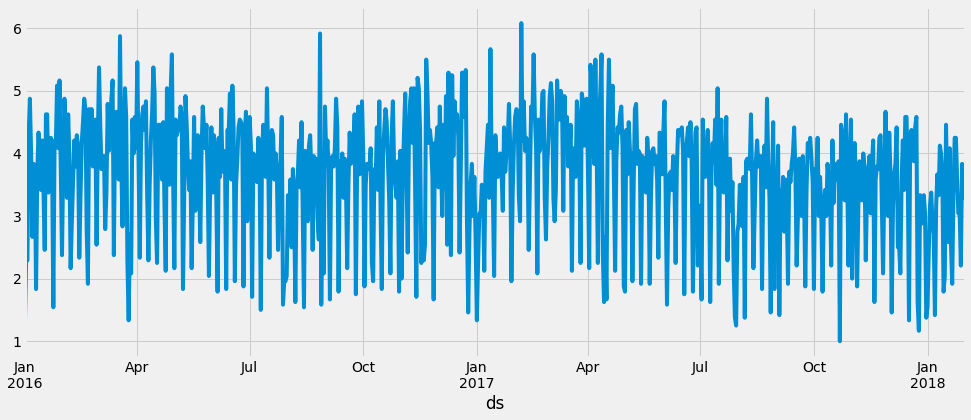

In [26]:
y.plot(figsize=(15, 6))
plt.show()

In [27]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [28]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=(1, 0, 0),
                                            seasonal_order=(0, 0, 0, 0),
                                            mle_regression=True, 
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2471.0242220208756
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2471.0242220208756
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2471.0242220208756
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2471.0242220208756
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2471.0242220208756
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2471.0242220208756
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2471.0242220208756
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2471.0242220208756
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2471.0242220208756
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2471.0242220208756
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2471.0242220208756
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2471.0242220208756
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2471.0242220208756
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2471.0242220208756
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2471.0242220208756
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2471.0242220208756
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2471.0242220208756
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2471.024222

In [29]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 1), # un año
                                enforce_stationarity=True,
                                enforce_invertibility=False)
results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0713      0.018      3.860      0.000       0.035       0.108
ma.L1         -1.0118      0.004   -272.962      0.000      -1.019      -1.004
ar.S.L1        0.0713      0.018      3.860      0.000       0.035       0.108
ma.S.L1       -1.0118      0.004   -272.962      0.000      -1.019      -1.004
sigma2         0.8508      0.045     18.749      0.000       0.762       0.940


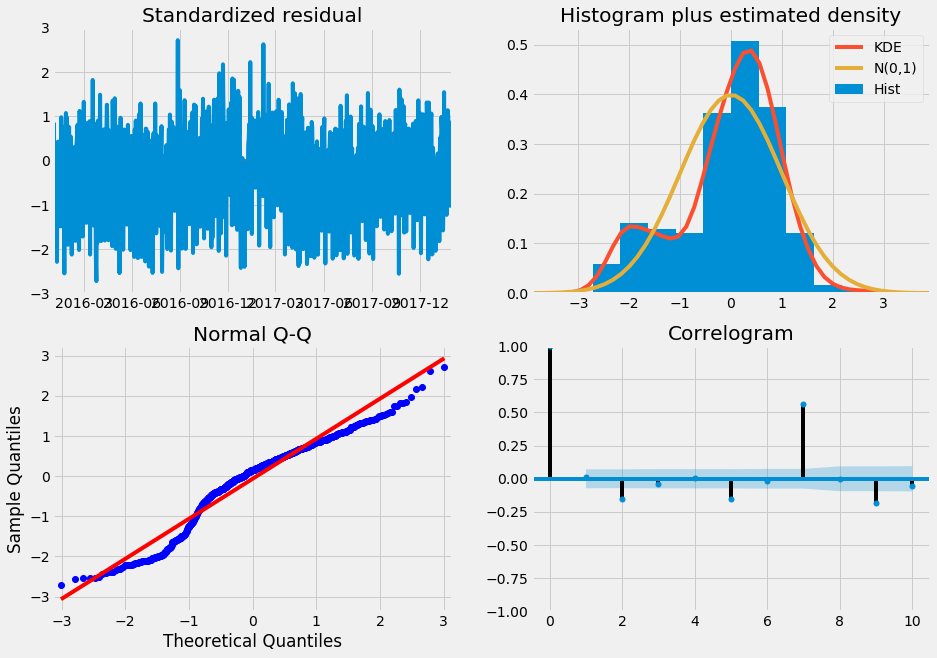

In [30]:
results.plot_diagnostics(figsize=(14, 10))
plt.show()

In [31]:
pred = results.get_prediction(start=pd.to_datetime('2017-08-01'), dynamic=False)
pred_ci = pred.conf_int()

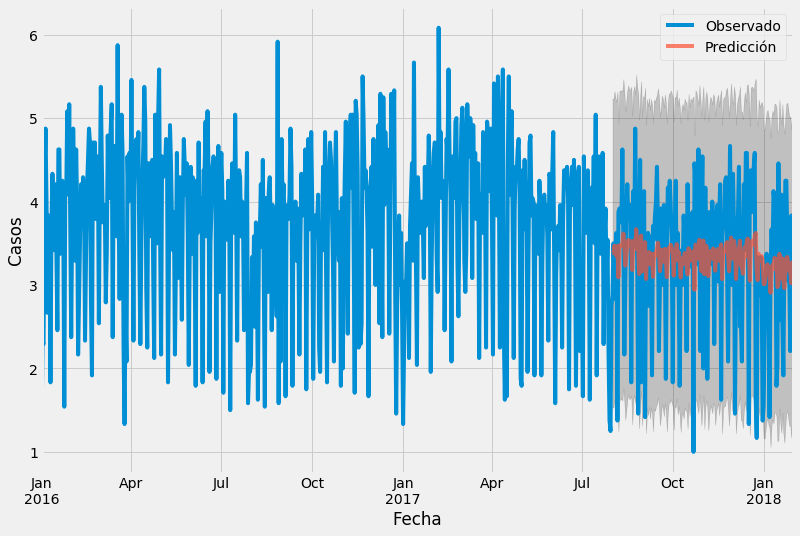

In [32]:
ax = y['2016':].plot(label='Observado',figsize=(12, 8))
pred.predicted_mean.plot(ax=ax, label='Predicción', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Fecha')
ax.set_ylabel('Casos')
plt.legend()

plt.show()

In [44]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-08-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))



The Mean Squared Error of our forecasts is 0.75


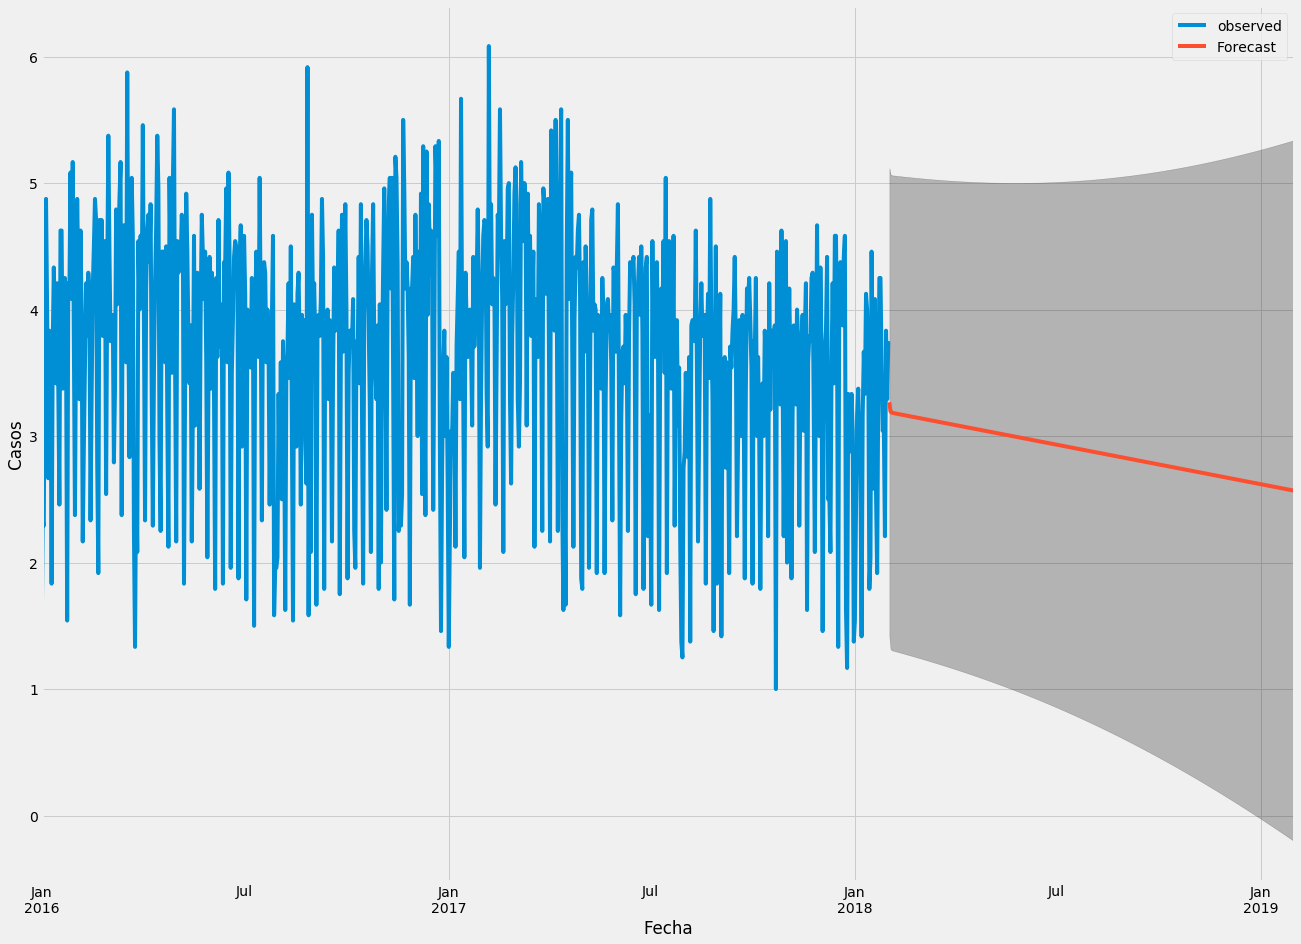

In [43]:
pred_uc = results.get_forecast(steps=365)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Fecha')
ax.set_ylabel('Casos')

plt.legend()
plt.show()

In [34]:
from pandas import ExcelWriter


predict=pred_uc.predicted_mean


pd.DataFrame(predict).to_excel('ARIMA_DIARIO.xls', index=True)

Modo dinámico

In [118]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2017-08-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

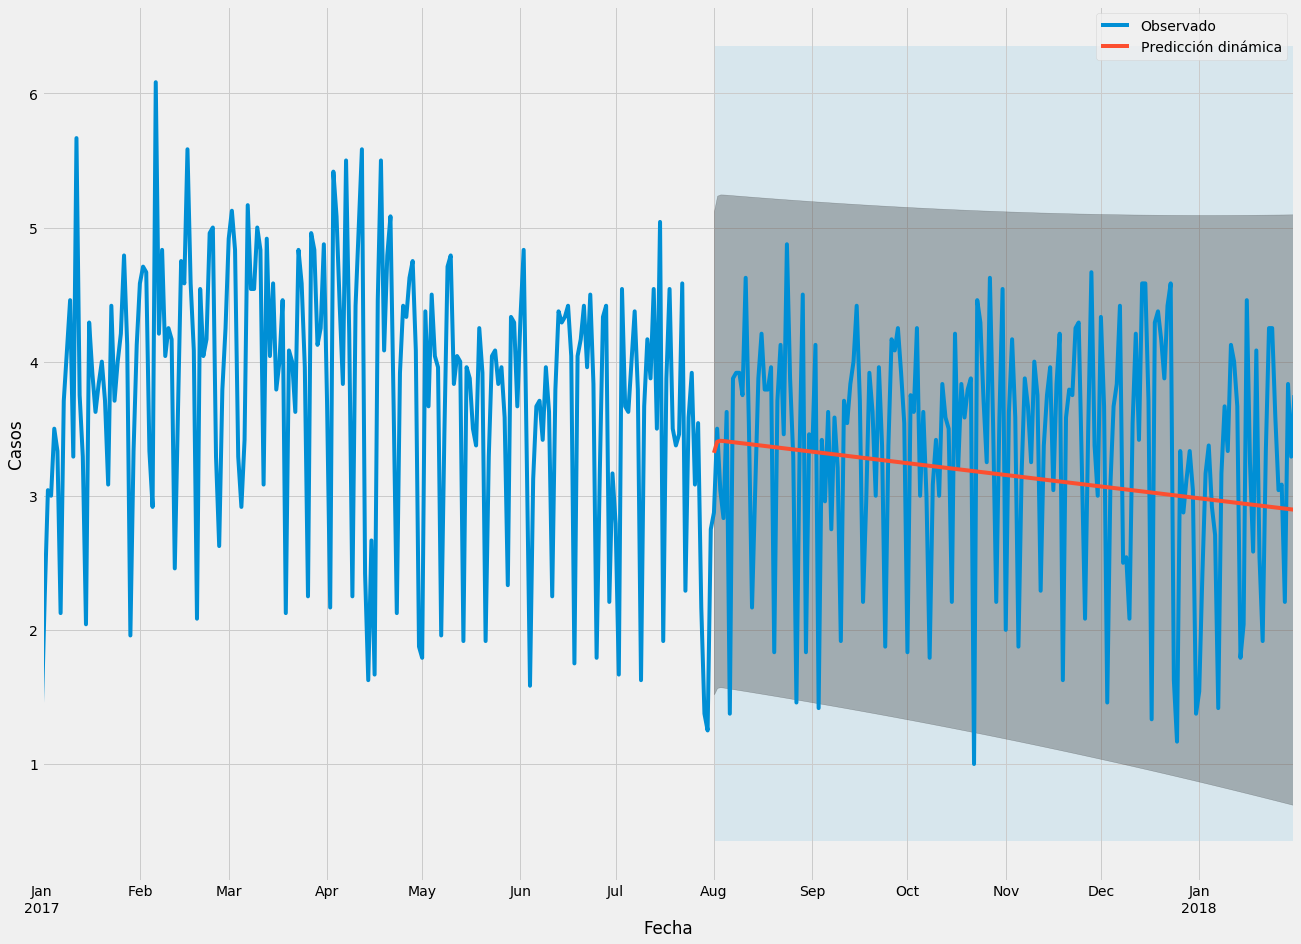

In [122]:
ax = y['2017-01-01':].plot(label='Observado', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Predicción dinámica', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2017-08-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Fecha')
ax.set_ylabel('Casos')

plt.legend()
plt.show()

In [123]:
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['2017-08-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.77


In [128]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=365)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

In [ ]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Fecha')
ax.set_ylabel('Casos')

plt.legend()
plt.show()

In [ ]:
from pandas import ExcelWriter


predict=pred_uc.predicted_mean


pd.DataFrame(predict).to_excel('report_D.xls', index=True)